### Data loading and preprocessing

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [7]:
#Load data
df = pd.read_json(r'C:\Code\ML_Project\Data\preprocessed_movieDB.json')
df=df[df['revenue']<100*1e+6]

In [8]:
scaler = MinMaxScaler()
df['budget'] = scaler.fit_transform(df['budget'].values.reshape(-1, 1))

In [9]:
# Creating binning
bin_size =20
df['revenue_bin'] = np.floor(df['revenue'] / (bin_size*1e+6 )).astype(int)

In [10]:
#Create feature and class target
X = df.drop(['title', 'revenue', 'revenue_bin'], axis=1)
y = df['revenue_bin']

In [11]:
# Standard scale
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [12]:
#Train, validation, test set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### Finetune with GridSearch

In [13]:
param_grid = {  
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9, None], 
    'max_leaf_nodes': [3, 6, 9], 
} 

In [14]:
grid_search = GridSearchCV(DecisionTreeClassifier(), 
                           param_grid=param_grid, verbose= 6) 
grid_search.fit(X_train, y_train) 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3;, score=0.634 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3;, score=0.634 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3;, score=0.633 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3;, score=0.633 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3;, score=0.633 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=6;, score=0.648 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=6;, score=0.648 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=6;, score=0.638 total time=   0.0s


[CV 4/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=6;, score=0.633 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=6;, score=0.651 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=9;, score=0.657 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=9;, score=0.637 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=9;, score=0.644 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=9;, score=0.633 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=9;, score=0.627 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=log2, max_leaf_nodes=3;, score=0.634 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=log2, max_leaf_nodes=3;, score=0.634 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=log2, max_leaf_nodes=3;, score=0.633 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=log2, max_l

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, None],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9]},
             verbose=6)

In [15]:
grid_search.best_params_

{'max_depth': 6, 'max_features': None, 'max_leaf_nodes': 9}

In [16]:
model_random = grid_search.best_estimator_
y_pred_rand = model_random.predict(X_test) 
print(confusion_matrix(y_test, y_pred_rand))

[[323   2   1  10   0]
 [ 65  10   1   9   0]
 [ 22   0   1  17   0]
 [  8   0   0  20   0]
 [  5   0   0  19   0]]


In [17]:
f1 = f1_score(y_test, y_pred_rand, average='weighted')
print(f"F1 Score: {f1}")

F1 Score: 0.6164450473779778


### Using with hyperparameter

In [18]:
model = DecisionTreeClassifier(max_depth=6, max_features=None, max_leaf_nodes=9)
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 

In [19]:
cx= confusion_matrix(y_test, y_pred)
cx

array([[323,   2,   1,  10,   0],
       [ 65,  10,   1,   9,   0],
       [ 22,   0,   1,  17,   0],
       [  8,   0,   0,  20,   0],
       [  5,   0,   0,  19,   0]], dtype=int64)

In [20]:
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")

F1 Score: 0.6164450473779778


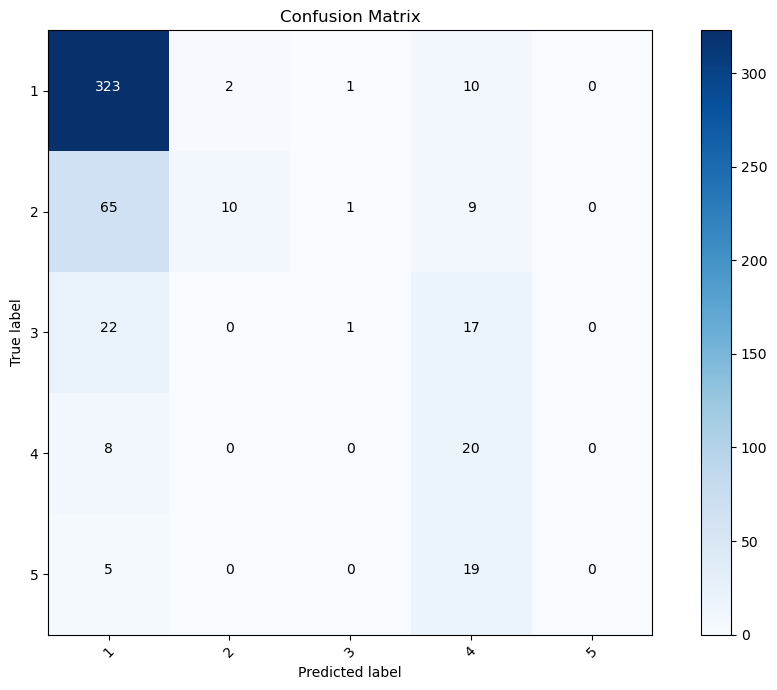

In [21]:
plt.figure(figsize=(10, 7))
plt.imshow(cx, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['1', '2', '3', '4', '5']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cx.max() / 2.
for i in range(cx.shape[0]):
    for j in range(cx.shape[1]):
        plt.text(j, i, format(cx[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cx[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [22]:
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85       336
           1       0.83      0.12      0.21        85
           2       0.33      0.03      0.05        40
           3       0.27      0.71      0.39        28
           4       0.00      0.00      0.00        24

    accuracy                           0.69       513
   macro avg       0.44      0.36      0.30       513
weighted avg       0.68      0.69      0.62       513

